In [92]:
import numpy as np
import  math
from tabulate import tabulate
from random import random
import networkx as nx
from kmodes.kmodes import KModes
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import fast_tsp

# Datos proporcionados
productos = ["P1", "P2", "P3", "P4", "P5"]
ventas_promedio = [119, 140, 155, 158, 176]
volumenes_productos = [1, 0.8, 1.2, 1.5, 0.6]
numero_clientes = 10
productos_c_cliente = []

In [93]:
poisson = lambda x, t: (t**(x)*math.exp(-t))/math.factorial(x)
poissonAcum = lambda x,t, include: sum([poisson(i,t) for i in range(x + (1 if include else 0))])
tabla = {
"# Productos":     [i for i in range(11)],
"poisson"  :    [poisson(i, 2) for i in range(11)],
"Acumulado" : [poissonAcum(i, 2, True) for i in range(11)],
"limInf":   [0] + [poissonAcum(i, 2, True) for i in range(10)],
"limSup":   [poissonAcum(i, 2, True) for i in range(11)]
}

print("--- TABLA POSSION PARA RULEATA ---")
print(tabulate(tabla, headers="keys"))

--- TABLA POSSION PARA RULEATA ---
  # Productos      poisson    Acumulado    limInf    limSup
-------------  -----------  -----------  --------  --------
            0  0.135335        0.135335  0         0.135335
            1  0.270671        0.406006  0.135335  0.406006
            2  0.270671        0.676676  0.406006  0.676676
            3  0.180447        0.857123  0.676676  0.857123
            4  0.0902235       0.947347  0.857123  0.947347
            5  0.0360894       0.983436  0.947347  0.983436
            6  0.0120298       0.995466  0.983436  0.995466
            7  0.00343709      0.998903  0.995466  0.998903
            8  0.000859272     0.999763  0.998903  0.999763
            9  0.000190949     0.999954  0.999763  0.999954
           10  3.81899e-05     0.999992  0.999954  0.999992


In [94]:
def ruleata(frequencia):
    r = random()
    limites = (np.array(ventas_promedio)/sum(ventas_promedio)).cumsum()
    for i in range(len(limites)):
        if r<limites[i]:
            return i
rangos = list(zip(tabla["limInf"], tabla["limSup"], tabla["# Productos"]))
numPiezas = lambda x: [rango[2] for rango in rangos if rango[0]<x<=rango[1] or (rango[1] == rangos[10][1] and x>rango[1]) ][0]
num = np.vectorize(numPiezas)
unidadesPorCliente = num(np.random.random_sample(numero_clientes,))
unidadesPorCliente

array([2, 4, 3, 0, 2, 4, 2, 2, 2, 1])

In [95]:
# Simulación de la venta de la empresa para un día
productos_c_cliente = []
for cliente in range(numero_clientes):

    # Selección aleatoria de productos
    productosPorCliente= []
    for i in range(unidadesPorCliente[cliente]):
        productosPorCliente.append(productos[ruleata(ventas_promedio)])
    productos_c_cliente.append(productosPorCliente.copy())

In [96]:
productos_c_cliente
product_volume_dict = dict(zip(productos, volumenes_productos))
volumenes = np.array([sum([product_volume_dict[i] for i in products]) for products in productos_c_cliente])

In [97]:
tabla = {
    "Id cliente": [i+1 for i in range(numero_clientes)],
    "Unidades por cliente": unidadesPorCliente,
    "Productos por cliente": productos_c_cliente,
    "Volumen por pedido": volumenes
}
print("--- TABLA SIMULACIÓN CLIENTES ---")
print(tabulate(tabla, headers="keys"))

--- TABLA SIMULACIÓN CLIENTES ---
  Id cliente    Unidades por cliente  Productos por cliente       Volumen por pedido
------------  ----------------------  ------------------------  --------------------
           1                       2  ['P1', 'P5']                               1.6
           2                       4  ['P4', 'P4', 'P5', 'P1']                   4.6
           3                       3  ['P1', 'P5', 'P1']                         2.6
           4                       0  []                                         0
           5                       2  ['P1', 'P1']                               2
           6                       4  ['P5', 'P3', 'P1', 'P2']                   3.6
           7                       2  ['P2', 'P3']                               2
           8                       2  ['P3', 'P1']                               2.2
           9                       2  ['P5', 'P1']                               1.6
          10                       1 

In [98]:
tiempos_no_warehouse = np.array([
    [0, 1.5, 1.7, 1.6, 0.7, 0.1, 0.5, 1.5, 1, 1.7],
    [0.4, 0, 0.1, 1.1, 1.5, 1.1, 1.1, 1.4, 0.7, 1.1],
    [0.2, 1.7, 0, 0.5, 0.7, 1.6, 1.8, 1.2, 1, 1.5],
    [0.9, 1.6, 1.1, 0, 0.4, 1.8, 1.3, 1.7, 0.3, 0.1],
    [1.1, 0.1, 0.5, 0.8, 0, 0.6, 0.9, 1.9, 1, 1.9],
    [1.7, 0.4, 0.4, 0.7, 1.7, 0, 0.6, 0.6, 1.5, 0.3],
    [ 0.9, 1.6, 1.8, 1.4, 1.2, 1.5, 0, 0.4, 0.6, 1.9],
    [ 0.8, 2, 0.8, 0.3, 0.3, 1.9, 1.6, 0, 1.4, 2],
    [0.1, 0.6, 0.3, 0.3, 2, 1.4, 0.5, 1.6, 0, 1.7],
    [1.9, 0.8, 0.2, 0.8, 1.7, 0.7, 2, 1.6, 1.7, 0]
])

tiempos = np.array([
    [0, 0.4, 1.5, 0.6, 0.1, 1.3, 1.1, 0.5, 1.3, 0.6, 0.5],
    [1.2, 0, 1.5, 1.7, 1.6, 0.7, 0.1, 0.5, 1.5, 1, 1.7],
    [0.5, 0.4, 0, 0.1, 1.1, 1.5, 1.1, 1.1, 1.4, 0.7, 1.1],
    [1.6, 0.2, 1.7, 0, 0.5, 0.7, 1.6, 1.8, 1.2, 1, 1.5],
    [1.3, 0.9, 1.6, 1.1, 0, 0.4, 1.8, 1.3, 1.7, 0.3, 0.1],
    [1.4, 1.1, 0.1, 0.5, 0.8, 0, 0.6, 0.9, 1.9, 1, 1.9],
    [1.4, 1.7, 0.4, 0.4, 0.7, 1.7, 0, 0.6, 0.6, 1.5, 0.3],
    [1.3, 0.9, 1.6, 1.8, 1.4, 1.2, 1.5, 0, 0.4, 0.6, 1.9],
    [1.5, 0.8, 2, 0.8, 0.3, 0.3, 1.9, 1.6, 0, 1.4, 2],
    [0.7, 0.1, 0.6, 0.3, 0.3, 2, 1.4, 0.5, 1.6, 0, 1.7],
    [1.2, 1.9, 0.8, 0.2, 0.8, 1.7, 0.7, 2, 1.6, 1.7, 0]
])

def costo(path):
    c = 0
    for i in range(len(path)):
        c+=tiempos[path[i-1]][path[i]]
    return c

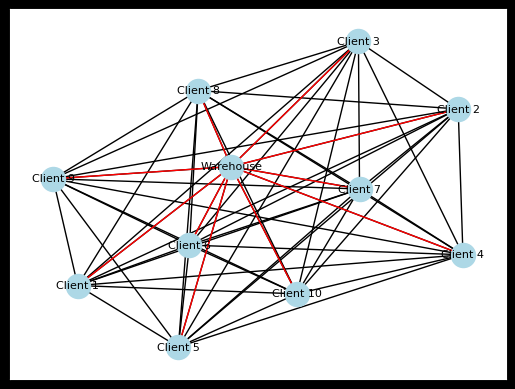

In [99]:
plt.axes().set_facecolor("white")

labelDict = {'Warehouse': 0, 'Client 1': 1, 'Client 2': 2, 'Client 3': 3, 'Client 4': 4, 'Client 5': 5, 'Client 6': 6, 'Client 7': 7, 'Client 8': 8, 'Client 9': 9, 'Client 10': 10}

matrix = np.array([
    [0, 0.4, 1.5, 0.6, 0.1, 1.3, 1.1, 0.5, 1.3, 0.6, 0.5],
    [1.2, 0, 1.5, 1.7, 1.6, 0.7, 0.1, 0.5, 1.5, 1, 1.7],
    [0.5, 0.4, 0, 0.1, 1.1, 1.5, 1.1, 1.1, 1.4, 0.7, 1.1],
    [1.6, 0.2, 1.7, 0, 0.5, 0.7, 1.6, 1.8, 1.2, 1, 1.5],
    [1.3, 0.9, 1.6, 1.1, 0, 0.4, 1.8, 1.3, 1.7, 0.3, 0.1],
    [1.4, 1.1, 0.1, 0.5, 0.8, 0, 0.6, 0.9, 1.9, 1, 1.9],
    [1.4, 1.7, 0.4, 0.4, 0.7, 1.7, 0, 0.6, 0.6, 1.5, 0.3],
    [1.3, 0.9, 1.6, 1.8, 1.4, 1.2, 1.5, 0, 0.4, 0.6, 1.9],
    [1.5, 0.8, 2, 0.8, 0.3, 0.3, 1.9, 1.6, 0, 1.4, 2],
    [0.7, 0.1, 0.6, 0.3, 0.3, 2, 1.4, 0.5, 1.6, 0, 1.7],
    [1.2, 1.9, 0.8, 0.2, 0.8, 1.7, 0.7, 2, 1.6, 1.7, 0]
])

G = nx.from_numpy_array(matrix)

# Create a mapping for node labels using the dictionary
label_mapping = {v: k for k, v in labelDict.items()}

# Draw the graph with labels
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True, labels=label_mapping, node_color='lightblue', font_size=8)

# Highlight lines coming from or to the Warehouse in red

edges = G.edges()
warehouse_edges = [(edge[0], edge[1]) for edge in edges if edge[0] == labelDict['Warehouse'] or edge[1] == labelDict['Warehouse']]
nx.draw_networkx_edges(G, pos, edgelist=warehouse_edges, edge_color='red')
plt.show()


In [129]:
import numpy as np
from scipy.spatial.distance import cdist

def k_medoids(X, k, max_iters=100):
    num_samples, num_features = X.shape
    medoids_indices = np.random.choice(num_samples, k, replace=False)
    medoids = X[medoids_indices]

    for _ in range(max_iters):
        distances = cdist(X, medoids, metric='euclidean')
        cluster_assignments = np.argmin(distances, axis=1)

        for i in range(k):
            cluster_points = X[cluster_assignments == i]
            cluster_distances = distances[cluster_assignments == i][:, i]
            new_medoid_index = np.argmin(cluster_distances)
            medoids[i] = cluster_points[new_medoid_index]

    return medoids, cluster_assignments

# Ejemplo de uso

# Aquí debes definir tu matriz X (tiempos_no_warehouse)
X = tiempos_no_warehouse

k = 0
unsolved = True
while unsolved:
    k+=1
    medoids, cluster_assignments = k_medoids(X, k)

    clusters = {}
    cluster_distances_matrices = {}  # Aquí almacenaremos las matrices de distancias para cada cluster
    restricciones = {}
    tours = {}
    for i in range(k):
        cluster_points = np.where(cluster_assignments == i)[0]
        clusters[i] = [0] + list(cluster_points + 1)
        cluster_matrix = ((tiempos[clusters[i]])[:, clusters[i]]*10).astype(int)
        cluster_distances_matrices[i] = cluster_matrix
        tours[i] = fast_tsp.find_tour(cluster_matrix)
        restricciones[i] = {
            "Volumen":sum(volumenes[cluster_points]),
            "Tiempo": costo(fast_tsp.find_tour(cluster_matrix))
        }
    unsolved = False
    for cluster_id, node_indices in clusters.items():
        if restricciones[cluster_id]["Tiempo"]>8 or restricciones[cluster_id]["Volumen"]>8:
            unsolved = True
        

print(f"Resultado con k = {k}")
tiempo_total = 0
colores = []
for cluster_id, node_indices in clusters.items():
    print(f"Cluster {cluster_id+1}: Nodos {node_indices}")
    print(f"Restricciones: {restricciones[cluster_id]}")
    tiempo_total+=restricciones[cluster_id]["Tiempo"]
    l = []
    for i in range(len(tours[cluster_id])):
        l.append((node_indices[tours[cluster_id][i]], node_indices[tours[cluster_id][(i+1)%len(tours[cluster_id])]]))
    colores.append(l.copy())
print(f"Tiempo total {tiempo_total} horas")

Resultado con k = 6
Cluster 1: Nodos [0, 10]
Restricciones: {'Volumen': 0.6, 'Tiempo': 1.6}
Cluster 2: Nodos [0, 2, 4, 5]
Restricciones: {'Volumen': 6.6, 'Tiempo': 4.3}
Cluster 3: Nodos [0, 1, 7]
Restricciones: {'Volumen': 3.6, 'Tiempo': 3.1}
Cluster 4: Nodos [0, 3, 8]
Restricciones: {'Volumen': 4.800000000000001, 'Tiempo': 3.1}
Cluster 5: Nodos [0, 9]
Restricciones: {'Volumen': 1.6, 'Tiempo': 1.6}
Cluster 6: Nodos [0, 6]
Restricciones: {'Volumen': 3.5999999999999996, 'Tiempo': 1.6}
Tiempo total 15.299999999999999 horas


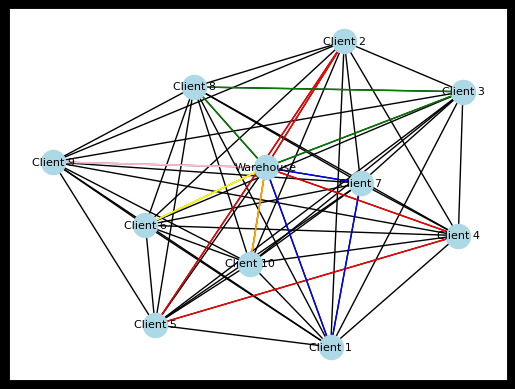

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (6, 7), (6, 8), (6, 9), (6, 10), (7, 8), (7, 9), (7, 10), (8, 9), (8, 10), (9, 10)])

In [132]:
plt.axes().set_facecolor("white")

labelDict = {'Warehouse': 0, 'Client 1': 1, 'Client 2': 2, 'Client 3': 3, 'Client 4': 4, 'Client 5': 5, 'Client 6': 6, 'Client 7': 7, 'Client 8': 8, 'Client 9': 9, 'Client 10': 10}

G = nx.from_numpy_array(matrix)

# Create a mapping for node labels using the dictionary
label_mapping = {v: k for k, v in labelDict.items()}

# Draw the graph with labels
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True, labels=label_mapping, node_color='lightblue', font_size=8)

# Highlight lines coming from or to the Warehouse in red

edges = G.edges()
warehouse_edges = [(edge[0], edge[1]) for edge in edges if edge[0] == labelDict['Warehouse'] or edge[1] == labelDict['Warehouse']]
c = 0
name = ["orange", "red", "blue", "green", "pink", "yellow", "purple"]
for color in colores:
    nx.draw_networkx_edges(G, pos, edgelist=color, edge_color=name[c])
    c+=1
plt.show()
edges